## Problem Statement:
    
### Ecommerce company based in New York City that sells clothing online but they also have in-store style and 
### clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, 
### then they can go home and order either on a mobile app or website for the clothes they want. 
### The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [6]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%run dqr.py

In [7]:
#Reading the ecommerce data file
os.chdir("/Users/macmojave/Downloads")
customer = pd.read_csv('Ecommerce_customers.csv')

In [8]:
customer.head(4)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344


In [9]:
#Data size
#Data shape
#Data dimensions

print(customer.size)
print(customer.shape)
print(customer.ndim)

4000
(500, 8)
2


In [10]:
customer.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [11]:
#Standardize the column names

#Create a dictionary 

dict1 = { 'Avg. Session Length': 'avg_session_length', 
         'Time on App': 'time-on_app', 
         'Time on Website': 'time-on_web',
         'Length of Membership':'membership_length', 
         'Yearly Amount Spent': 'annual_amt_spent'}

customer.rename(columns = dict1, inplace=True)

In [12]:
customer.columns

Index(['Email', 'Address', 'Avatar', 'avg_session_length', 'time-on_app',
       'time-on_web', 'membership_length', 'annual_amt_spent'],
      dtype='object')

In [13]:
r1 = dataQuality(customer)

In [14]:
r1['categorical']

,Count,Unique,Miss_per,Freq_Level,freq_cat_Per
Email,500,500,0.0,mstephenson@fernandez.com,0.002
Address,500,500,0.0,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",0.002
Avatar,500,138,0.0,SlateBlue,0.014


In [15]:
r1['numeric']

,Count,Unique,Miss_per,Min,Max,Mean,Median,Std,Q1,Q3,q99
avg_session_length,500.0,500.0,0.0,29.532429,36.139662,33.053194,33.082008,0.992563,32.341822,33.711985,35.434143
time-on_app,500.0,500.0,0.0,8.508152,15.126994,12.052488,11.983231,0.994216,11.388153,12.753850,14.221649
time-on_web,500.0,500.0,0.0,33.913847,40.005182,37.060445,37.069367,1.010489,36.349257,37.716432,39.253342
membership_length,500.0,500.0,0.0,0.269901,6.922689,3.533462,3.533975,0.999278,2.930450,4.126502,5.841868
annual_amt_spent,500.0,500.0,0.0,256.670582,765.518462,499.314038,498.887875,79.314782,445.038277,549.313828,700.997273


In [16]:
dist = customer['Avatar'].value_counts()/customer.shape[0]

In [17]:
dist

SlateBlue               0.014
Cyan                    0.014
CadetBlue               0.014
GreenYellow             0.014
Teal                    0.014
                        ...  
MediumPurple            0.002
CornflowerBlue          0.002
LightGoldenRodYellow    0.002
PowderBlue              0.002
LawnGreen               0.002
Name: Avatar, Length: 138, dtype: float64

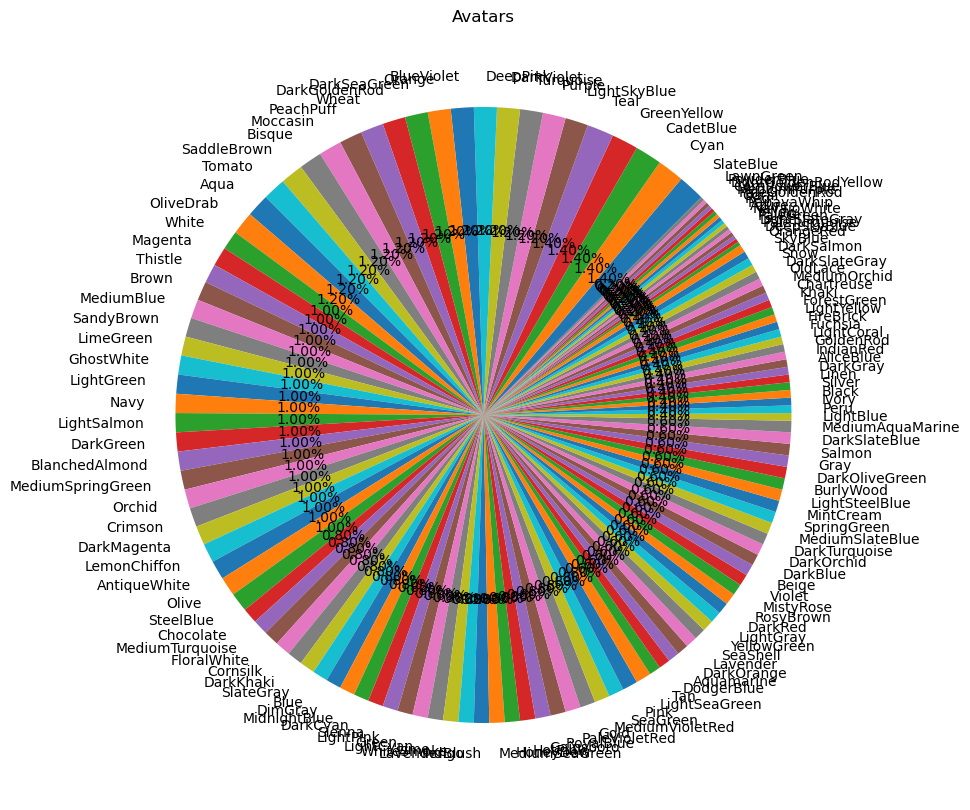

In [18]:
plt.subplots(figsize = (10,10))
plt.pie(x =dist.values, labels = dist.index, startangle = 45, autopct = "%.2f%%")
plt.title("Avatars")
plt.show()

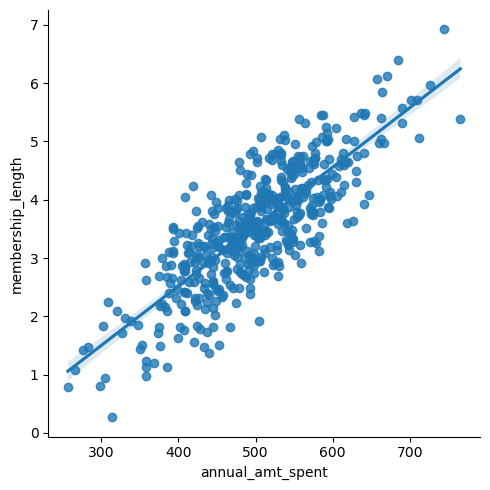

In [19]:
# Membership length

sb.lmplot(x = 'annual_amt_spent', y = 'membership_length', data = customer)

More the membership length, higher is the annual amount spent

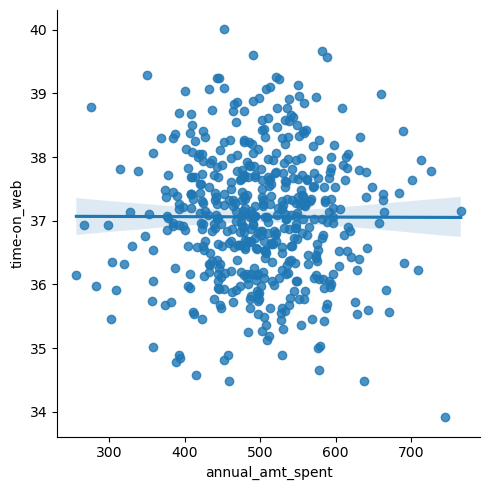

In [21]:
sb.lmplot(x = 'annual_amt_spent', y = 'time-on_web', data = customer)

Customers spending near 36-38min on web, are accountable for majority of purchase.

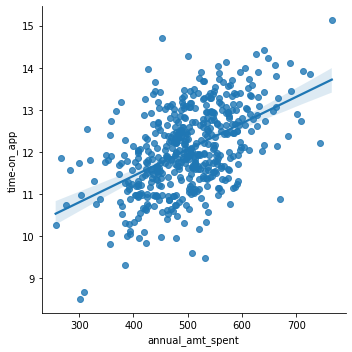

In [26]:
sb.lmplot(x = 'annual_amt_spent', y = 'time-on_app', data = customer)

Customers who spend more time (upto 14min) on app, make more purchase.

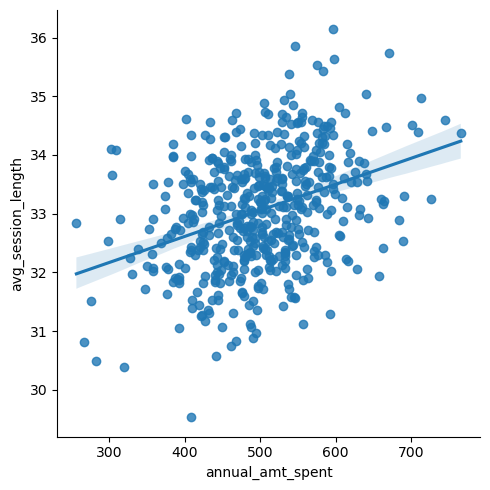

In [22]:
sb.lmplot(x = 'annual_amt_spent', y = 'avg_session_length', data = customer)

Customers who spend more time with personal stylist in sessions(upto 34 min), are spending more on purchase.

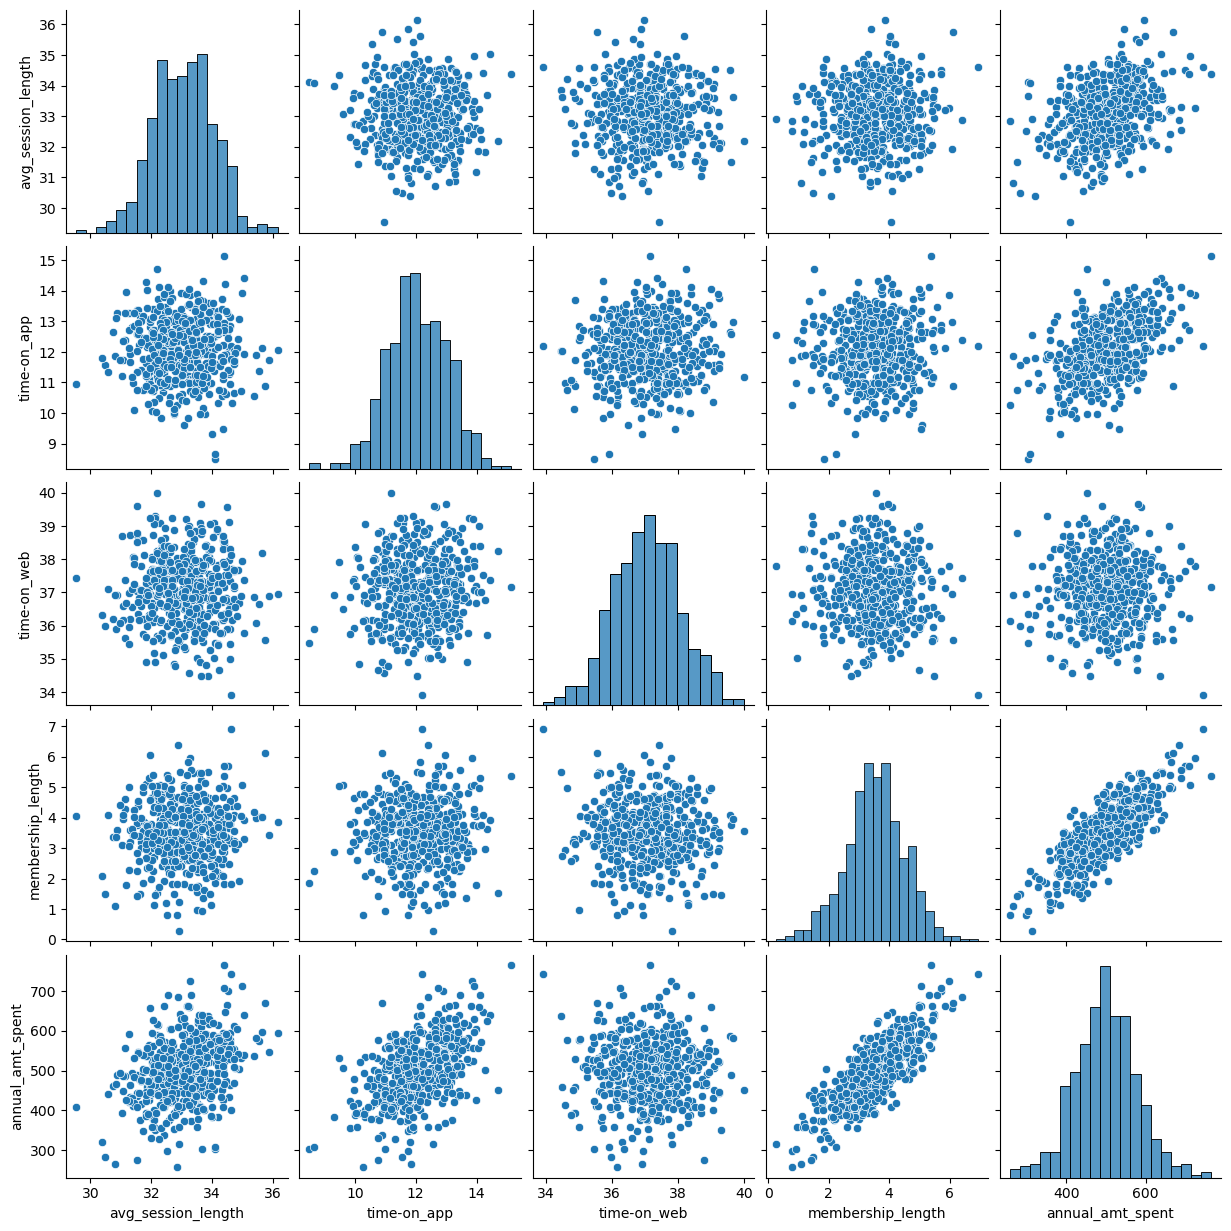

In [23]:
#Visualize Pairwise relationship
sb.pairplot(customer)

Clear rising trend can be seen between avg session length and annual amt spent, time on app and annual amt spent, membership length and annual amt spent, 

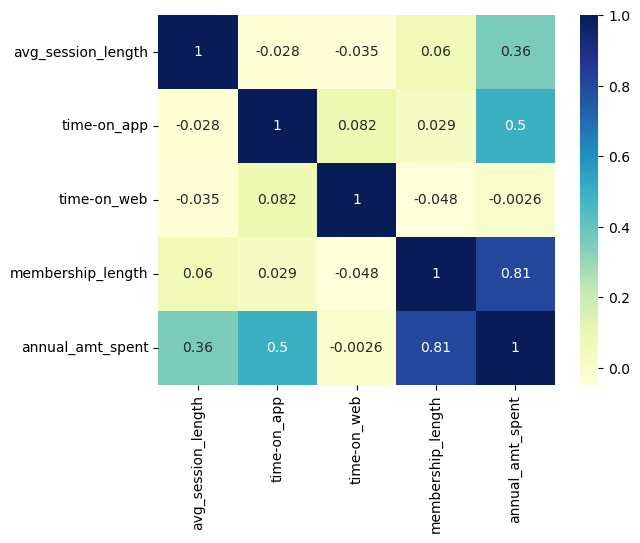

In [24]:
#Calculate pairwise correlations
correlation_map = sb.heatmap(customer.corr(), cmap = "YlGnBu", annot = True)
plt.show()

Correlation plot heatmap also confirms our last inference.

In [25]:
customer.annual_amt_spent.quantile([0.1, 0.25, 0.5, 0.75, 0.99])

0.10    403.814258
0.25    445.038277
0.50    498.887875
0.75    549.313828
0.99    700.997273
Name: annual_amt_spent, dtype: float64

In [26]:
#Bucketing the KPI variable
condition = [
    (customer['annual_amt_spent'] <= 490),
    (customer['annual_amt_spent'] > 490) & (customer['annual_amt_spent'] <= 600),
    (customer['annual_amt_spent'] > 600)]

values = ['low_spends', 'med_spends', 'high_spends']

customer['amt_spnt-bucket'] = np.select(condition,values)

In [27]:
customer['amt_spnt-bucket'].value_counts()

med_spends     234
low_spends     224
high_spends     42
Name: amt_spnt-bucket, dtype: int64

In [28]:
customer.columns

Index(['Email', 'Address', 'Avatar', 'avg_session_length', 'time-on_app',
       'time-on_web', 'membership_length', 'annual_amt_spent',
       'amt_spnt-bucket'],
      dtype='object')

In [29]:
customer.groupby('amt_spnt-bucket')['avg_session_length'].mean()

amt_spnt-bucket
high_spends    33.559084
low_spends     32.719529
med_spends     33.281798
Name: avg_session_length, dtype: float64

Average session length not a significant contributing factor.

In [30]:
customer.groupby('amt_spnt-bucket')['time-on_app'].mean()

amt_spnt-bucket
high_spends    13.157357
low_spends     11.637641
med_spends     12.251296
Name: time-on_app, dtype: float64

Some rising trend can be seen here.

In [31]:
customer.groupby('amt_spnt-bucket')['membership_length'].max()

amt_spnt-bucket
high_spends    6.922689
low_spends     4.650491
med_spends     5.462501
Name: membership_length, dtype: float64

Significant rising trend can be observed here.

In [34]:
def find_iqr(x):
    return np.subtract(*np.percentile(x, [75, 25]))

In [35]:
q75, q25 = np.percentile(customer['time-on_web'], [75, 25])

In [36]:
q75

37.716432275730966

In [37]:
q25

36.34925732959517

/Users/macmojave/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time-on_web'>

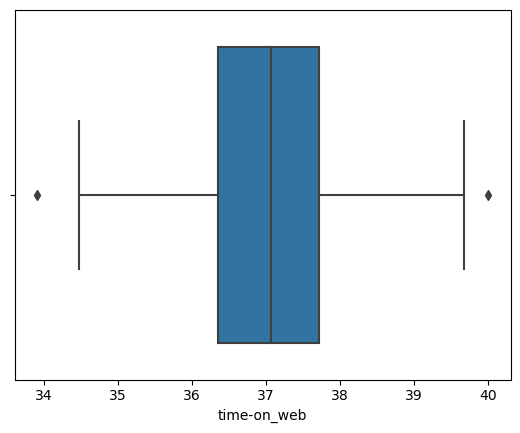

In [38]:
sb.boxplot(customer['time-on_web'])

Time spent on web doesn't markedly show a pattern in determining the customer's amout spend on purchase.